# Example 09: Pressure scaling

In some cases, it is useful to obtain the free energy as a function of the pressure. The calphy mode `pscale` allows to do this.

The EAM potential we will use is : [Mishin, Y., M. J. Mehl, D. A. Papaconstantopoulos, A. F. Voter, and J. D. Kress. “Structural Stability and Lattice Defects in Copper: Ab Initio , Tight-Binding, and Embedded-Atom Calculations.” Physical Review B 63, no. 22 (May 21, 2001): 224106.](https://doi.org/10.1103/PhysRevB.63.224106)

The input file is provided in the folder. The pressure scale input file is `input2.yaml`, in which we calculate the free energy at 1200 K from 0 to 1 GPa. To compare, we do direct free energy calculations at the same temperature and pressures of 0, 0.5 and 1 GPa. The input for this is provided in `input1.yaml`.


The calculation can be run by:

```
calphy -i input1.yaml
calphy -i input2.yaml
```

After the calculations are over, we can read in and analyse the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p1 = [0, 5000, 10000]
fe1 = [-4.072, -4.032, -3.993]

The above values are taken from the `report.yaml` files in the corresponding folders.

Note that calphy uses bar as the unit of pressure.

Now read in the pressure scaling results.

In [45]:
p2, fe2, ferr2 = np.loadtxt("pscale-FCC-1200-0/pressure_sweep.dat", unpack=True)


Now plot

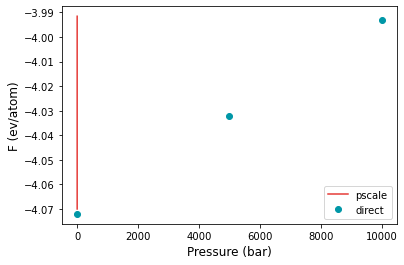

In [46]:
plt.plot(p2, fe2, color="#E53935", label="pscale")
plt.plot(p1, fe1, 'o', color="#0097A7", label="direct")
plt.xlabel("Pressure (bar)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

In [6]:
from scipy.integrate import cumtrapz
import os

In [34]:
_, fp, fvol, _ = np.loadtxt(os.path.join('pscale-FCC-1200-0', "forward_1.dat"), unpack=True, comments="#")
_, bp, bvol, _ = np.loadtxt(os.path.join('pscale-FCC-1200-0', "backward_1.dat"), unpack=True, comments="#")

In [35]:
natoms = 4*7**3
fvol = fvol/natoms
bvol = bvol/natoms

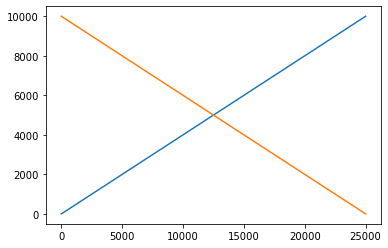

In [36]:
#plt.plot(fvol)
plt.plot(fp)
plt.plot(bp)

In [32]:
len(fp)

45001

In [37]:
fp = fp/(10000*160.21766208)
bp = bp/(10000*160.21766208)

In [38]:
wf = cumtrapz(fvol, fp, initial=0)
wb = cumtrapz(bvol[::-1], bp[::-1], initial=0)

In [39]:
w = (wf+wb)/2

In [40]:
len(w)

25001

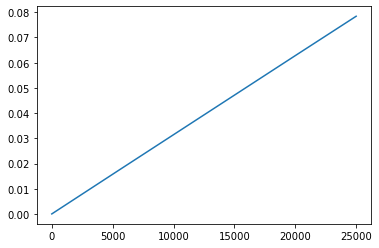

In [41]:
plt.plot(w)

Although there are some fluctutions at very low pressures, otherwise both methods show excellent agreement. The initial fluctuations can be removed by using longer run times.